<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install pyxirr

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-04-30 18:03:59
-------------------
qualified stocks: 93
with latest results: 87
still star stocks: 46
-------------------
Initial Investment:  1.10 C
CY Investment:  1.37 C
Reserve:  2.28 L
Current:  1.17 C
-------------------
Today PnL: -1.16 L (-0.99%)
Current PnL: -21.11 L (-15.41%)
CY Booked + Current PnL: -19.10 L (-13.94%)
-------------------
Total profit:  3.58 L
Total loss:  -24.70 L
-------------------
Total Booked + Current PnL: 7.88 L (7.16%)
Total Booked PnL: 28.99 L (26.35%)
Curr Year Booked PnL: 2.01 L (1.73%)
Prev Year Booked PnL: 26.98 L (24.52%)
Est FTT:  1.95 C
Est FTT PnL: 78.77 L (67.53%)
-------------------
Est LTT:  2.56 C
Est LTT PnL: 1.39 C (119.38%)
Deployed:  1.10 C
Current:  1.17 C
CAGR/XIRR %: 4.13%
Row successfully appended and saved to data/myPortfolioDB.csv.


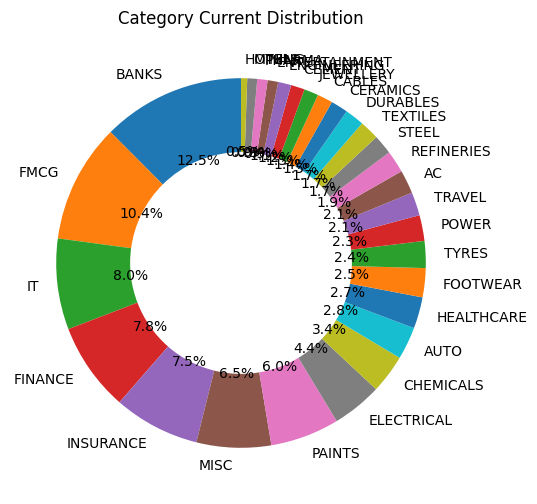

In [23]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 1

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k) - set( list_x40n))

In [24]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
32,HDFCBANK,1561.04,2170.00,4.66,X-LC,79.57,102025.0,19290.0,12988.0,0.85,...,12.73,39.01,4.0,1.49,0.89,34.80,X40,BTT,LC,BANKS
70,SBILIFE,1496.49,1924.99,-0.07,H-LC,92.47,148327.0,22622.0,13379.0,2.06,...,9.02,28.63,NaN,1.69,1.30,32.14,AR,ATH,LC,INSURANCE
57,PIDILITIND,2504.06,3576.00,-12.81,X-LC,70.97,91017.0,15895.0,16265.0,0.96,...,17.87,42.81,10.0,0.98,0.80,14.15,X40,BTT,LC,CHEMICALS
63,RELIANCE,1288.53,1526.00,4.09,X-LC,87.10,221990.0,18402.0,19113.0,0.38,...,8.61,18.43,67.0,0.96,1.94,20.92,XY25,NTT,LC,REFINERIES
33,HDFCLIFE,562.05,897.00,1.04,H-LC,69.89,92962.0,22706.0,19159.0,4.01,...,20.61,59.59,16.0,1.19,0.81,39.63,X40,BTT,LC,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,REPCOHOME,515.07,880.00,-13.82,H-SC,94.62,160553.0,-44445.0,189693.0,0.54,...,118.15,70.85,-44.0,-0.23,1.40,29.61,XY24,NTT,SC,FINANCE
61,RBLBANK,230.61,388.00,-5.50,M-SC,90.32,203576.0,-30724.0,190629.0,-1.37,...,93.64,68.25,-48.0,-0.16,1.78,34.06,XY24,NTT,SC,BANKS
66,SAIL,130.64,228.00,72.16,M-MC,18.28,195809.0,-29153.0,196808.0,-1.36,...,100.51,74.53,-18.0,-0.15,1.71,13.69,XY24,BTT,MC,STEEL
11,BANDHANBNK,214.25,400.00,-29.37,H-SC,84.95,192119.0,-56411.0,271887.0,-1.36,...,141.52,86.70,-29.0,-0.21,1.68,27.10,XY24,NTT,SC,BANKS


In [25]:
# High quality (X40 + X5K) allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
4,ADANIPORTS,1103.69,1583.00,-5.49,M-LC,51.61,166660.0,15454.0,50215.0,0.01,...,30.13,43.43,NaN,0.31,1.46,15.52,XY24,NTT,LC,MISC
7,ASIANPAINT,2961.56,4250.00,-28.10,X-LC,62.37,164948.0,-36438.0,124057.0,-1.04,...,75.21,43.51,-18.0,-0.29,1.44,13.77,X40,BTT,LC,PAINTS
12,BANKINDIA,112.90,190.00,-26.97,M-MC,58.06,102253.0,1998.0,66464.0,-2.27,...,65.00,68.29,-12.0,0.03,0.89,27.45,XR,NTT,MC,BANKS
13,BATAINDIA,1550.24,2096.00,-33.21,M-SC,21.51,100297.0,-28373.0,73668.0,-0.27,...,73.45,35.20,-8.0,-0.39,0.88,2.33,X40,NTT,SC,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-21.37,H-MC,83.87,172511.0,-4546.0,43041.0,-0.32,...,24.95,21.75,-14.0,-0.11,1.51,23.40,XY24,NTT,MC,PAINTS
21,COLPAL,2837.00,3808.06,5.76,X-MC,81.72,129370.0,-12480.0,61037.0,-2.15,...,47.18,34.23,-21.0,-0.20,1.13,10.08,X40,ATH,MC,FMCG
22,DABUR,505.20,735.00,-13.66,X-LC,20.43,190222.0,-6806.0,96424.0,0.85,...,50.69,45.49,1.0,-0.07,1.66,8.05,XY24,BTT,LC,FMCG
27,GICRE,340.22,583.00,2.32,H-MC,43.01,97613.0,18002.0,38811.0,-3.83,...,39.76,71.36,109.0,0.46,0.85,33.32,XY24,BTT,MC,INSURANCE
31,HAVELLS,1595.53,2077.12,1.55,X-LC,67.74,185716.0,635.0,55232.0,-1.34,...,29.74,30.18,NaN,0.01,1.62,13.78,X40,ATH,LC,ELECTRICAL
32,HDFCBANK,1561.04,2170.00,4.66,X-LC,79.57,102025.0,19290.0,12988.0,0.85,...,12.73,39.01,4.0,1.49,0.89,34.80,X40,BTT,LC,BANKS


In [26]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
3,ACC,2579.05,3906.0,-40.67,M-MC,15.05,137824.0,-50447.0,147320.0,-0.22,...,106.89,51.45,-37.0,-0.34,1.21,3.82,XY24,BTT,MC,CEMENT
4,ADANIPORTS,1103.69,1583.0,-5.49,M-LC,51.61,166660.0,15454.0,50215.0,0.01,...,30.13,43.43,NaN,0.31,1.46,15.52,XY24,NTT,LC,MISC
9,ATULAUTO,624.44,844.0,-40.50,M-SC,5.38,109622.0,-37746.0,89561.0,-5.90,...,81.70,35.16,-49.0,-0.42,0.96,11.97,XY24,NTT,SC,AUTO
10,AWL,361.39,485.0,-68.91,H-MC,41.94,137531.0,-48585.0,112239.0,-0.32,...,81.61,34.20,-36.0,-0.43,1.20,13.28,XY24,NTT,MC,FMCG
11,BANDHANBNK,214.25,400.0,-29.37,H-SC,84.95,192119.0,-56411.0,271887.0,-1.36,...,141.52,86.70,-29.0,-0.21,1.68,27.10,XY24,NTT,SC,BANKS
14,BERGEPAINT,558.54,680.0,-21.37,H-MC,83.87,172511.0,-4546.0,43041.0,-0.32,...,24.95,21.75,-14.0,-0.11,1.51,23.40,XY24,NTT,MC,PAINTS
17,CAMPUS,294.86,393.0,-34.52,M-SC,55.91,138085.0,-29690.0,85530.0,-0.57,...,61.94,33.28,-16.0,-0.35,1.21,6.91,XY24,NTT,SC,FOOTWEAR
22,DABUR,505.20,735.0,-13.66,X-LC,20.43,190222.0,-6806.0,96424.0,0.85,...,50.69,45.49,1.0,-0.07,1.66,8.05,XY24,BTT,LC,FMCG
25,EASEMYTRIP,18.12,26.4,-12.11,M-SC,23.66,117389.0,-59426.0,140221.0,-0.41,...,119.45,45.70,-91.0,-0.42,1.03,8.97,XY24,NTT,SC,TRAVEL
27,GICRE,340.22,583.0,2.32,H-MC,43.01,97613.0,18002.0,38811.0,-3.83,...,39.76,71.36,109.0,0.46,0.85,33.32,XY24,BTT,MC,INSURANCE


In [27]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
1,AARTIIND,487.04,919.00,13.38,M-SC,72.58,70349.0,-10987.0,83124.0,-2.22,...,118.16,88.69,-8.0,-0.13,0.62,18.63,XR,NTT,SC,CHEMICALS
2,ABB,5319.37,9007.77,-39.19,H-LC,49.46,138062.0,5078.0,87131.0,-1.09,...,63.11,69.34,NaN,0.06,1.21,11.90,AR,ATH,LC,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-17.97,X-SC,46.24,73212.0,-27751.0,123194.0,-3.95,...,168.27,94.53,-59.0,-0.23,0.64,8.54,SR,ATH,SC,CHEMICALS
8,ASIANTILES,75.41,137.00,280.48,M-SC,45.16,56067.0,-37743.0,114360.0,3.82,...,203.97,81.67,-16.0,-0.33,0.49,8.58,XR,NTT,SC,CERAMICS
12,BANKINDIA,112.90,190.00,-26.97,M-MC,58.06,102253.0,1998.0,66464.0,-2.27,...,65.00,68.29,-12.0,0.03,0.89,27.45,XR,NTT,MC,BANKS
15,BRITANNIA,4905.19,6446.05,10.30,X-LC,86.02,217556.0,21348.0,40291.0,-0.54,...,18.52,31.41,239.0,0.53,1.90,18.88,AR,ATH,LC,FMCG
16,BSOFT,628.85,844.81,-27.19,M-SC,40.86,68285.0,-41764.0,79559.0,-1.90,...,116.51,34.34,-28.0,-0.52,0.60,12.42,XR,ATH,SC,IT
18,CAMS,3643.00,5250.99,-1.77,H-SC,66.67,109376.0,7372.0,37647.0,-2.34,...,34.42,44.14,261.0,0.20,0.96,28.08,XR,ATH,SC,MISC
20,COFFEEDAY,59.14,80.00,-129.58,L-SC,93.55,61517.0,-52032.0,92085.0,1.97,...,149.69,35.27,NaN,-0.57,0.54,50.56,XR,NTT,SC,HOTELS
23,DEN,52.79,75.00,-38.26,L-SC,34.41,51952.0,-32512.0,68047.0,-1.90,...,130.98,42.07,-21.0,-0.48,0.45,10.33,AR,NTT,SC,ENTERTAINMENT


In [28]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.10
1,20,34.97
2,30,48.18


In [29]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,38.02
X40,14.69
X40N,13.10
AR,12.64
XY25,9.82
XR,9.33
X200,1.20
SR,1.19


In [30]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,20.03
H-SC,19.77
M-SC,18.78
M-MC,7.74
H-MC,6.95
M-LC,6.91
X-MC,6.69
H-LC,6.23
X-SC,2.63


In [31]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          9.10
          M-SC          8.99
X40       X-LC          8.20
XY25      X-LC          5.56
XY24      M-MC          5.24
          M-LC          5.08
X40N      H-SC          5.04
          M-SC          3.93
XY24      H-MC          3.56
AR        X-LC          3.41
XR        H-SC          3.27
          M-SC          2.91
AR        H-LC          2.51
          X-MC          2.35
X40       M-SC          1.87
XY25      M-LC          1.83
X40       H-MC          1.78
XY24      X-LC          1.66
X40N      X-MC          1.62
XY24      X-MC          1.59
XY25      H-LC          1.56
AR        H-SC          1.46
X40N      H-LC          1.35
X200      X-LC          1.20
AR        H-MC          1.19
X40N      X-SC          1.16
X40       X-MC          1.13
XR        L-SC          1.01
XY24      L-SC          0.96
X40       H-SC          0.90
XR        M-MC          0.89
XY25      M-MC          0.87
XR        X-SC          0.83
X40       H-LC          0.81
AR        M-MC          0.74
SR        X-SC          0.64
          M-SC          0.55
AR        M-SC          0.53
          L-SC          0.45
XR        H-MC          0.42
Name: CurrAlloc%, dtype: float64

In [32]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,12.47,-9.40,62.17
FMCG,10.39,-1.85,33.40
IT,7.96,-33.35,99.81
FINANCE,7.75,-24.80,81.12
INSURANCE,7.54,1.34,34.64
MISC,6.51,-38.32,88.37
PAINTS,6.03,-19.27,54.56
ELECTRICAL,4.37,-18.15,68.23
CHEMICALS,3.40,-21.70,105.55


In [33]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,73.05,8356856.0,-12.58,-1051387.0,57.65,4817845.0


In [34]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,33.7,3855582.0,-0.41,-15979.0,36.17,1394379.0


In [35]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3214077.0
X40N,1240496.0
XR,1169154.0
AR,1048000.0
X40,743580.0
SR,208884.0
XY25,172462.0
X200,80273.0


In [36]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2249381.0
M-SC,2215543.0
X-LC,849717.0
M-MC,659679.0
X-SC,375932.0
H-MC,375647.0
L-SC,320029.0
M-LC,266095.0
X-MC,254187.0


In [37]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1027968.0
          H-SC           949472.0
X40N      H-SC           557655.0
XY24      M-MC           475040.0
XR        M-SC           453419.0
X40       X-LC           399644.0
AR        H-SC           393881.0
X40N      M-SC           387243.0
XR        H-SC           299765.0
XY24      M-LC           246387.0
          H-MC           194091.0
AR        X-LC           188893.0
X40       M-SC           164624.0
XR        L-SC           163684.0
          X-SC           131013.0
SR        X-SC           123194.0
X40N      X-SC           121725.0
          X-MC           117273.0
AR        H-LC           100510.0
          M-SC            96599.0
XY24      X-LC            96424.0
AR        M-MC            91846.0
XY24      L-SC            88298.0
SR        M-SC            85690.0
XY25      X-LC            84483.0
X200      X-LC            80273.0
AR        H-MC            76239.0
          L-SC            68047.0
XR        M-MC            66464.0
X40       X-MC            61037.0
X40N      H-LC            56600.0
XR        H-MC            54809.0
X40       H-MC            50508.0
          H-SC            48608.0
XY24      X-MC            43892.0
XY25      H-LC            41942.0
AR        X-MC            31985.0
XY25      M-MC            26329.0
          M-LC            19708.0
X40       H-LC            19159.0
Name: FTT Amt, dtype: float64

In [38]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,22
H-SC,19
X-LC,14
M-MC,7
H-MC,7
H-LC,5
X-MC,5
M-LC,5
X-SC,4
